In [6]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
! pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.9.0
    Uninstalling Pygments-2.9.0:
      Successfully uninstalled Pygments-2.9.0
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\gopi2\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\gopi2\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install --upgrade tensorflow --user

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\gopi2\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
Y_train.shape

(50000, 1)

In [19]:
Y_train=Y_train.reshape(-1,)

In [20]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
classes[9]

'truck'

In [23]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))

    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


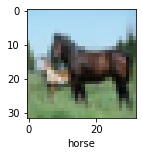

In [26]:
plot_sample(X_train,Y_train,12)

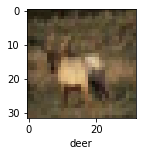

In [27]:
plot_sample(X_train,Y_train,3)

In [28]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [29]:
X_train=X_train/255
X_test=X_test/255

# Trying ANN for the dataset

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
    
])

In [45]:
x

In [46]:
model.fit(X_train,Y_train,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.3000 - loss: 1.9327
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4184 - loss: 1.6471
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4539 - loss: 1.5529


In [49]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4275 - loss: 1.6037


[1.6095525026321411, 0.4230000078678131]

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(Y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      1000
           1       0.74      0.31      0.43      1000
           2       0.33      0.29      0.31      1000
           3       0.32      0.28      0.30      1000
           4       0.38      0.30      0.34      1000
           5       0.39      0.34      0.36      1000
           6       0.32      0.80      0.46      1000
           7       0.69      0.27      0.39      1000
           8       0.44      0.75      0.55      1000
           9       0.55      0.49      0.52      1000

    accuracy                           0.42     10000
   macro avg       0.47      0.42      0.41     10000
weighted avg       0.47      0.42      0.41     10000



# CNN network


In [59]:
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

c:\users\gopi2\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [60]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
cnn.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6768 - loss: 0.9311
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6853 - loss: 0.9009
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7022 - loss: 0.8653
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7089 - loss: 0.8366
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7246 - loss: 0.8063
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7292 - loss: 0.7780
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7428 - loss: 0.7432
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7513 - loss: 0.7255
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7622 - loss: 0.6959
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7690 - loss: 0.6729
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7776 - loss: 0.6473
Epoch 12/15
1563/15

In [66]:
cnn.save_weights('.weights.h5')

In [68]:
from tensorflow.keras.models import save_model

In [70]:
save_model(cnn,'cnn.h5')